In [17]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

In [3]:
#Analyze different time periods for RNN
for i in range(1023,1027):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(f"Runtest_{i}",df.groupby("Metric")["Relative_MSE"].mean())

Runtest_1023 Metric
ATR                0.676129
Squared_Returns    1.346297
Name: Relative_MSE, dtype: float64
Runtest_1024 Metric
ATR                6.213594
Squared_Returns    7.287342
Name: Relative_MSE, dtype: float64
Runtest_1025 Metric
ATR                0.288375
Squared_Returns    2.595777
Name: Relative_MSE, dtype: float64
Runtest_1026 Metric
ATR                2.382405
Squared_Returns    3.144229
Name: Relative_MSE, dtype: float64


We can see that ATR consistently outperforms squared returns, doing best when there is ample amounts of training data. This might demonstrate ATR's ability to not overfit the model.

In [4]:
#Analyze diff layer combos LSTM
for i in range(32,41):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(i,df.groupby('Metric')['Relative_MSE'].mean())

32 Metric
ATR                0.830029
Squared_Returns    0.895952
Name: Relative_MSE, dtype: float64
33 Metric
ATR                0.771406
Squared_Returns    0.628715
Name: Relative_MSE, dtype: float64
34 Metric
ATR                0.799177
Squared_Returns    0.824391
Name: Relative_MSE, dtype: float64
35 Metric
ATR                0.724802
Squared_Returns    0.823542
Name: Relative_MSE, dtype: float64
36 Metric
ATR                0.794125
Squared_Returns    0.964812
Name: Relative_MSE, dtype: float64
37 Metric
ATR                0.680897
Squared_Returns    0.544277
Name: Relative_MSE, dtype: float64
38 Metric
ATR                0.751495
Squared_Returns    0.594292
Name: Relative_MSE, dtype: float64
39 Metric
ATR                0.628070
Squared_Returns    0.565187
Name: Relative_MSE, dtype: float64
40 Metric
ATR                0.751546
Squared_Returns    0.677466
Name: Relative_MSE, dtype: float64


In [5]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10032
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.sort_values(by="MAPE").groupby(["ETF","Metric"])["MAPE"].mean()

ETF  Metric            
XLB  ATR                   0.266256
     IQR                   0.619908
     SD_Prices             0.280042
     SD_Squared_Returns    0.478726
XLE  ATR                   0.057128
     IQR                   0.264992
     SD_Prices             0.197459
     SD_Squared_Returns    0.153522
XLF  ATR                   0.079592
     IQR                   0.343253
     SD_Prices             0.211011
     SD_Squared_Returns    0.250468
XLI  ATR                   0.373795
     IQR                   0.525550
     SD_Prices             0.347876
     SD_Squared_Returns    0.542608
XLK  ATR                   0.578398
     IQR                   1.026267
     SD_Prices             0.511928
     SD_Squared_Returns    0.613281
XLP  ATR                   0.292475
     IQR                   0.399842
     SD_Prices             0.360124
     SD_Squared_Returns    0.511274
XLU  ATR                   0.161265
     IQR                   0.363459
     SD_Prices             0.284272
    

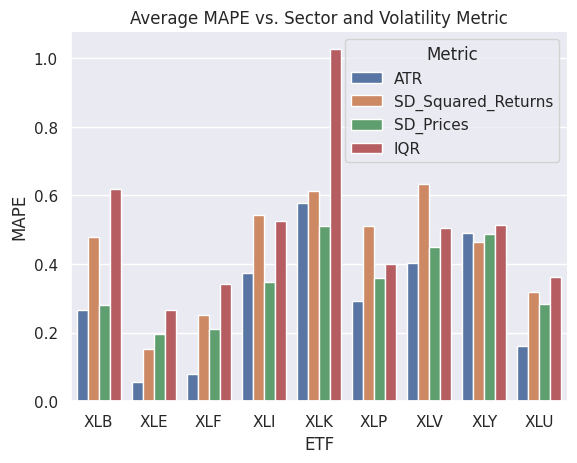

In [27]:
sns.barplot(df_final,x="ETF",y="MAPE",hue="Metric",errorbar=None)
sns.despine()
plt.title("Average MAPE vs. Sector and Volatility Metric")
out_root = '../output/analysis/'
plt.savefig(os.path.join(out_root,"avg_errors"))


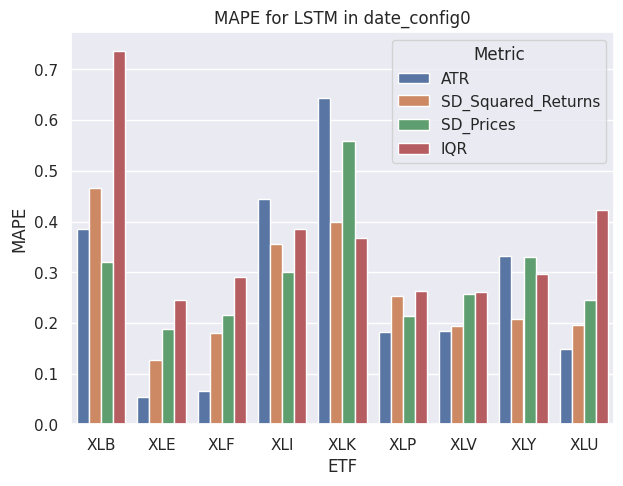

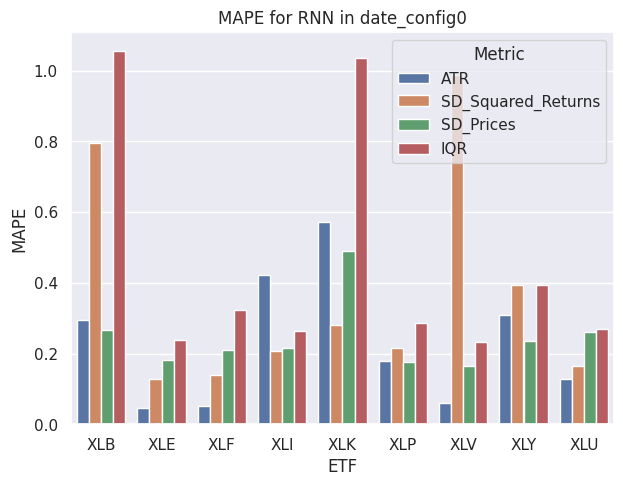

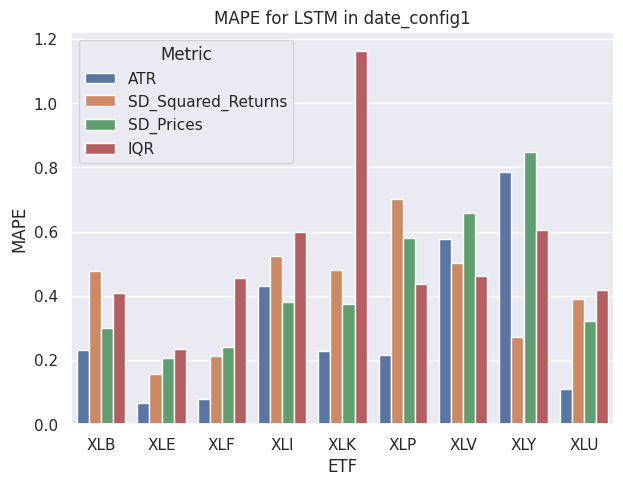

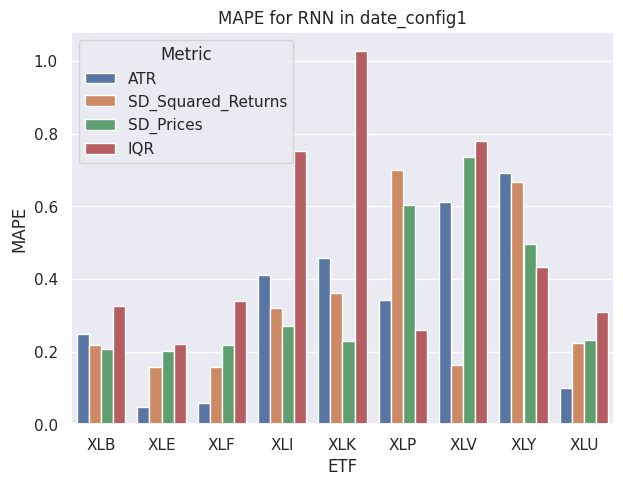

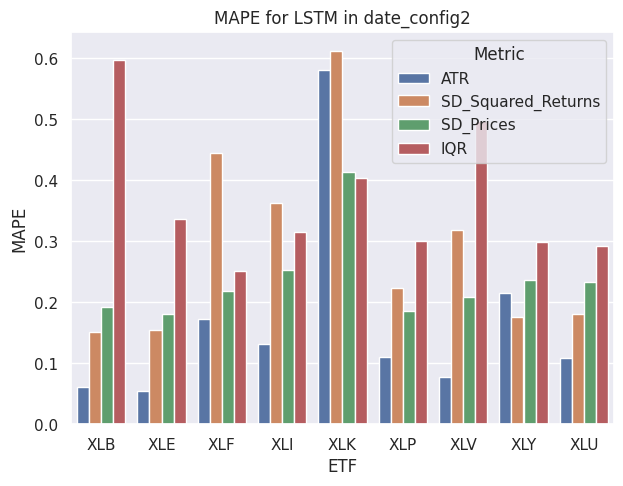

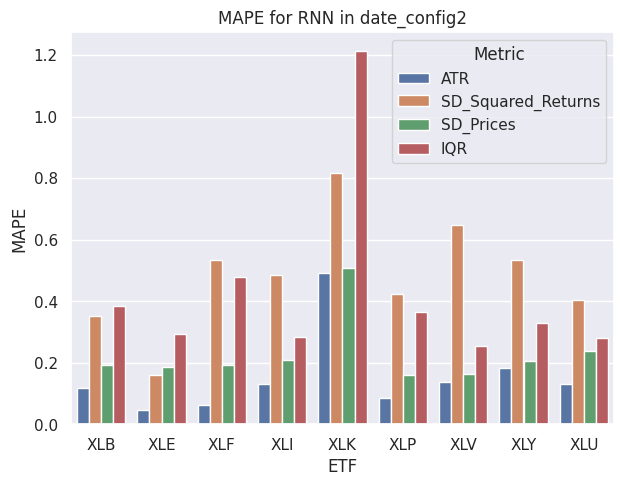

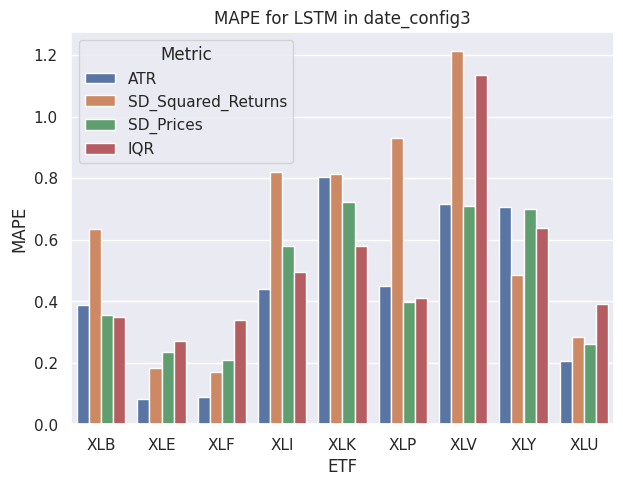

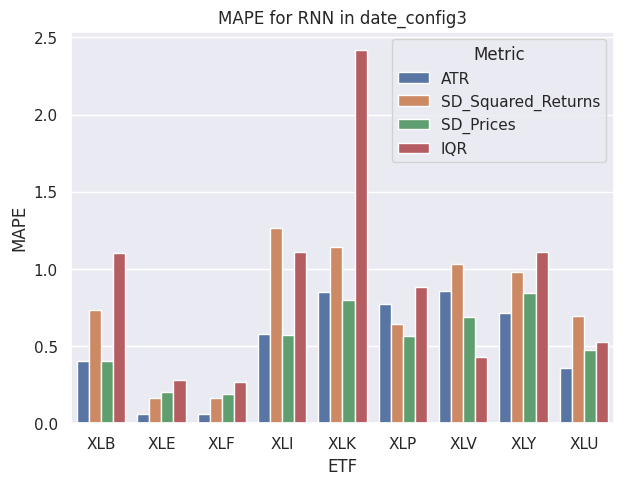

In [28]:
# show results
accuracy_metric = "MAPE"
for date,date_chunk in df_final.groupby("Date"): #returns (date_name,grouped section of df)
    for model,model_chunk in date_chunk.groupby("Model"):
        fig,ax = plt.subplots()
        sns.barplot(model_chunk,x="ETF",y=accuracy_metric,hue = "Metric", ax = ax)
        fig.tight_layout()
        ax.set_title(f"{accuracy_metric} for {model} in {date}")
        fig.savefig(fname=f"../output/analysis/{accuracy_metric}_{date}_{model}")

In [3]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10032
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["Final_Value"].mean()

ETF  Metric            
XLB  ATR                    995.856753
     IQR                    991.787047
     SD_Prices              987.123978
     SD_Squared_Returns    1040.220395
XLE  ATR                    925.472745
     IQR                    979.336129
     SD_Prices              964.676430
     SD_Squared_Returns     943.288416
XLF  ATR                   1067.780513
     IQR                   1038.677868
     SD_Prices              987.319258
     SD_Squared_Returns    1049.769177
XLI  ATR                    995.556620
     IQR                   1018.530140
     SD_Prices              985.707127
     SD_Squared_Returns    1061.018951
XLK  ATR                   1006.484706
     IQR                   1077.489906
     SD_Prices             1020.378095
     SD_Squared_Returns    1034.640756
XLP  ATR                   1017.850124
     IQR                    994.057138
     SD_Prices             1032.652813
     SD_Squared_Returns    1042.536791
XLU  ATR                   1010.483140
 

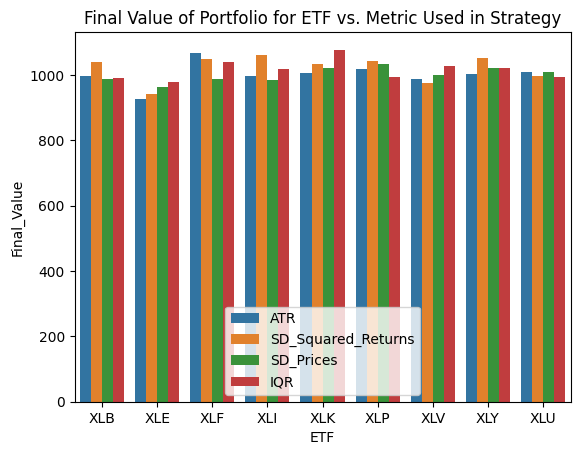

In [4]:
fig,ax = plt.subplots()
sns.barplot(df_final,x="ETF",y="Final_Value",hue="Metric",errorbar=None,ax=ax)
plt.title("Final Value of Portfolio for ETF vs. Metric Used in Strategy")
customize_ax(ax)
plt.savefig("../output/analysis/Final_Portfolio_Returns.png")

In [ ]:
#take corr between simulation and 